# (E1)1st_project-rock_scissor_paper_classifier
***

## Rock Scissor Paper DataBase

### 1. 학습용 데이터베이스에 각각 100가지의 데이터를 만들어주기 (https://teachablemachine.withgoogle.com/)

   ![Example a. Rock](https://i.imgur.com/5Sxb0ee.jpg) Example a. Rock (28x28)

   ![Example b. Scissor](https://i.imgur.com/QFgIzkR.jpg) Example b. Scissor (28x28)

   ![Example c. Paper](https://i.imgur.com/qW7LbKv.jpg)   Example c. Paper (28x28)

   ![Example Completed DataBase](https://i.imgur.com/qsaj8HU.png?1) Example Completed DataBase
    
    
### 2. 이미지 리사이즈

      이미지의 사이즈가 28x28이 아니면 리사이즈 과정이 필요하다
   

In [15]:
!pip install pillow   

from PIL import Image
import os, glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


해당 과정이 끝나면 모든 이미지의 사이즈가 28x28로 리사이즈 된 것을 확인 할 수 있다.

### 3. 학습용 이미지에 라벨 붙이기
    
      이제 가위 바위 보 이미지에 각각의 이름(라벨)값을 입력해주면 된다.

In [6]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


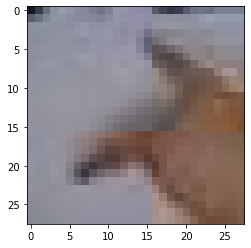

In [12]:
plt.imshow(x_train[21])
print('라벨: ', y_train[21])

라벨:  1


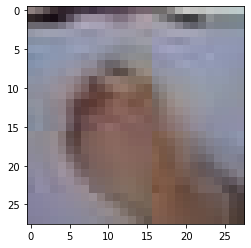

In [11]:
plt.imshow(x_train[121])
print('라벨: ', y_train[121])

라벨:  2


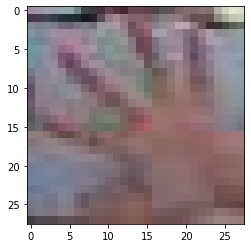

In [10]:
plt.imshow(x_train[221])
print('라벨: ', y_train[221])

이미지와 라벨을 불러보면 다음과 같이 y_train값에 형태의 값이 입력되있는 것을 확인할 수 있다.

### 4. 딥러닝 네트워크 설계 및 학습 시키기

      Sequential을 이용해 이제 앞에서 배웠던 것처럼 딥러닝 네트워크를 설계하고 트레이닝 데이터를 학습시키자    

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) #3인 이유는 조건이 가위, 바위, 보로 총 3가지이기 때문임

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3) #전의 숫자 이미지의 경우는 흑백이여서 1 이였지만 여기선 컬러, 즉 RGB이기 때문에 3채널이다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

train_loss, train_accuracy = model.evaluate(x_train_reshaped,y_train, verbose=2)

print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

### 5. 테스트 데이터베이스 만들어주기

      이제 작성을 완료한 딥러닝 네트워크의 성능을 확인하기위해 테스트를 진행해보자. 테스트 데이터베이스는 노고가 깃든(본인도 똑같이 진행한) 위의 과정을 거친 다른 동료의 데이터 베이스를 공유 받아서 진행한다.
      받아오는 과정 자체는 학습용 데이터베이스를 불러오는 과정과 똑같다.

In [18]:
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data(test_image_dir_path)
x_test_norm = x_test/255.0

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3) #마찬가지로 테스트셋도 RGB 3채널이다. 사실 이미 존재하기때문에 진행할 필요는 없다.

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


### 6. 성능 확인

    이제 모든 것이 끝났고 테스트 데이터베이스를 돌려서 성능을 확인해보이제 모든 것이 끝났고 테스트 데이터베이스를 돌려서 성능을 확인해보인자

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.3650 - accuracy: 0.7800
test_loss: 0.36495441198349 
test_accuracy: 0.7799999713897705


     평균적으로 45~50 정도의 정답률이 나왔는데 공유된 사진들 중에서 최대한 비슷하게 찍혀있거나 왜곡이 적은 이미지로 선정해서 데이터베이스를 만들었더니 확실히 성능이 아주 좋게 나온다.

***
## 결과와 결론

    
    다만 데이터베이스의 신뢰도가 떨어지는 경우(ex. 왜곡, 변형, 그림자, 배경과 동일한 색상 등) 정답률이 곤두박질 치는 모습을 볼 수 있었다.
    
    그래서 테스트 데이터베이스를 만들 때 최대한 비슷한 환경에서 동일한 조건의 데이터를 이용하여 테스트를 하자 일치율이 높아지는 것을 볼 수 있었다. 평균 50정도의 성능이 확인되었고 하이퍼파라미터들을 바꿔가면서 여러번 실행하자 90까지 육박하는 경우도 존재했다.
    그리고 워낙 적은 양의 데이터로 학습하기 때문에 하이퍼파라미터들의 숫자가 커져도 소요시간이 그닥 길어지진 않았다.
    
    더 나은 성능과 정확한 평가를 위해선 더 큰 데이터 베이스가 필요할 것이다.
    